In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('poster')

In [48]:
def calc_hist(new, retention):
    current = 0
    history = [current]
    for i in range(12):
        current = (current + new) * retention
        history.append(current)
    return history

,company,new users,retention
0,Hype Fructose Corn Syrup,2,0.6
1,Sticky Savor Honey,1,0.8


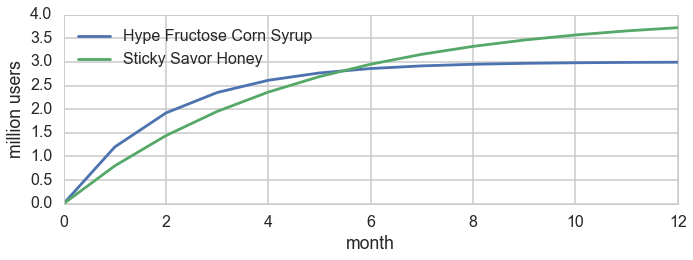

In [50]:
products = pd.DataFrame({
    'company': ['Hype Fructose Corn Syrup', 'Sticky Savor Honey'],
    'retention': [0.6, 0.8],
    'new users': [2, 1]
})

plt.figure(figsize=(10,4))
for i, prod in products.iterrows():
    plt.plot(calc_hist(prod['new users'], prod['retention']), label=prod['company'])
plt.xlabel('month')
plt.ylabel('million users')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('retention-for-2-products.png')
products

In [25]:
churn_factor = 0.3
new_users = 1

current_churn = 0
churn = [0]
current_active_users = 0
active_users = [0]


for i in range(12):
    current_churn = current_active_users * churn_factor
    churn.append(current_churn)   
    current_active_users -= current_churn
    
    current_active_users += new_users
    active_users.append(current_active_users)
    
df = pd.DataFrame({'new users': [new_users] * len(active_users), 'active users': active_users})
df['churn'] = churn

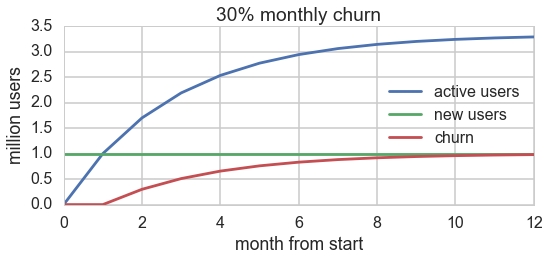

In [29]:
df.plot(figsize=(8,4))
plt.ylabel('million users')
plt.xlabel('month from start')
plt.title('30% monthly churn')
plt.tight_layout()
plt.savefig('30%_monthly_churn.png', dpi=200)